# Importing necessary libraries and dataset-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 8,4
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,4
sns.set(rc={'figure.figsize':(9.7,6.27)})

In [2]:
df1 = pd.read_csv('dataset1.csv')

## Variable description-

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking missing values

In [4]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Unique values in each variable-

In [5]:
df1.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Creating dummies for correlation plot-

In [6]:
df2 = pd.get_dummies(df1,columns=['SeniorCitizen','Partner','Dependents',\
          'PhoneService','MultipleLines','InternetService',\
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',\
          'StreamingTV','StreamingMovies','Contract','PaperlessBilling',\
          'PaymentMethod','Churn'], drop_first=True)

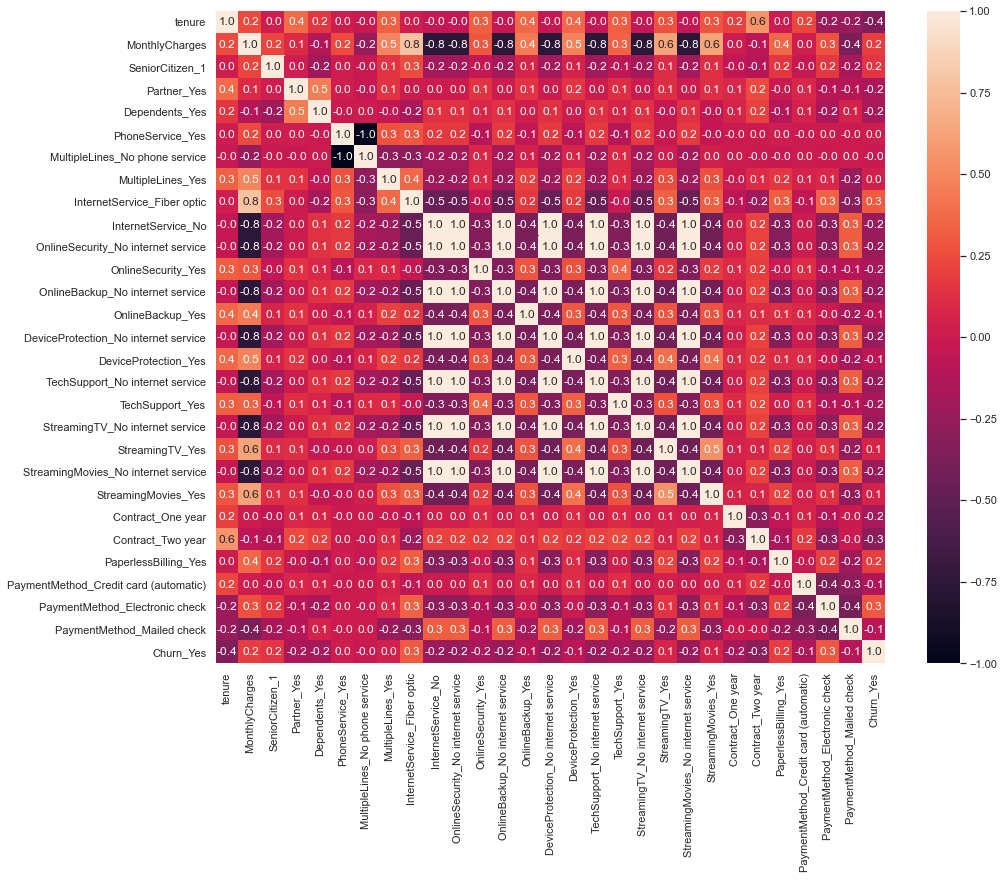

In [7]:
plt.figure(figsize = (15, 12))
sns.heatmap(df2.corr(), annot=True, fmt=".1f")
plt.show()

### Not much information can be drawn from the correlation plot as the independent variables does not correlate much with the dependent variable except some variables which correlate with eachother(At the end we'll try to do some feature selection, so we dont need to worry about this now).

---

## Using sweetviz library for EDA-

In [ ]:
import sweetviz

In [ ]:
df3 = pd.read_csv('dataset1.csv')

In [ ]:
df3 = pd.get_dummies(data = df3, columns = ['Churn'],drop_first=True)

In [ ]:
t = sweetviz.analyze([df2,'SWEET_CAT_CHURNYES'],target_feat= 'Churn_Yes')
t.show_html('SWEET_CAT_CHURNOP.html')

----

## More EDA and visualizations-

<AxesSubplot:xlabel='OnlineSecurity', ylabel='tenure'>

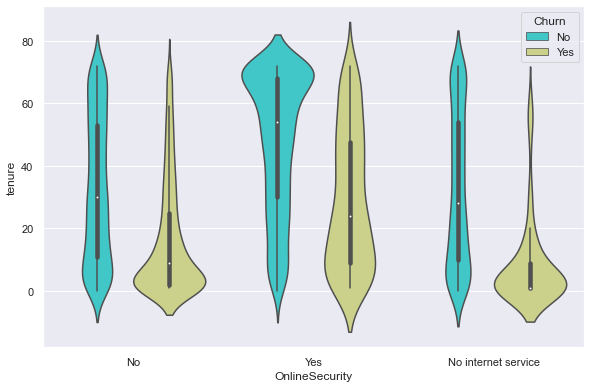

In [8]:
sns.violinplot(x="OnlineSecurity", y="tenure", data=df1,palette='rainbow', hue='Churn')

### It can be observed that when the customers had Online Security and whose tenure was between 60-80 churned less and when the customers didn't have Online Security with tenure between 0-20 churned more.

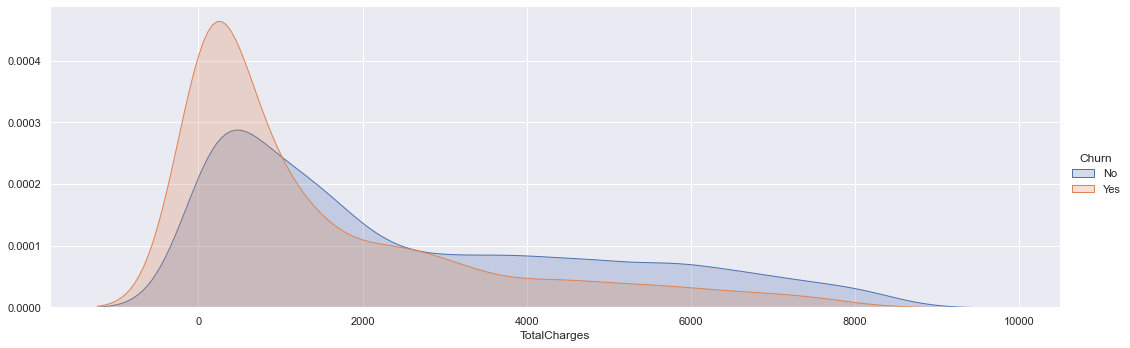

In [9]:
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], errors = 'coerce')
facet = sns.FacetGrid(df1, hue = "Churn", aspect = 3, height=5)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.add_legend()

### It can be observed that when the TotalCharges were below 1000, more customers churned but, as the TotalCharges increased from 1000 less number of customers got churned.

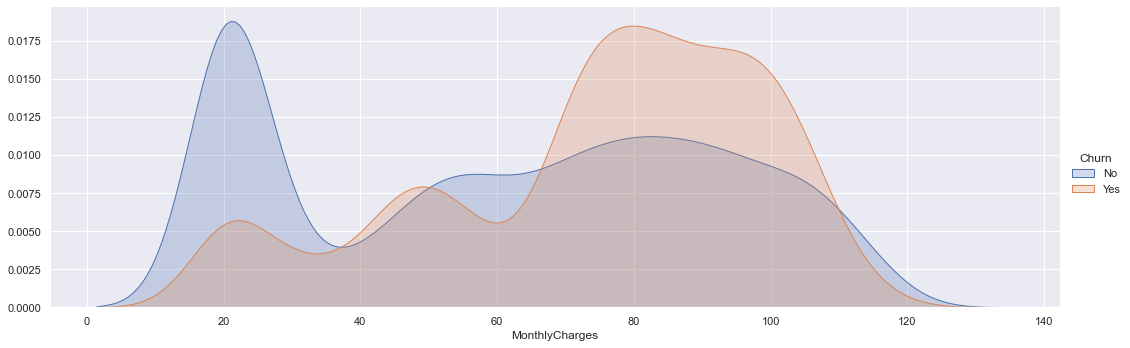

In [10]:
facet = sns.FacetGrid(df1, hue = "Churn", aspect = 3, height=5)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.add_legend()

### It can be observed that when the MonthlyCharges were between 0-40 and around 60, less customers churned and, when the MonthlyCharges were between 70-110, more number of customers got churned.

<AxesSubplot:xlabel='Partner', ylabel='tenure'>

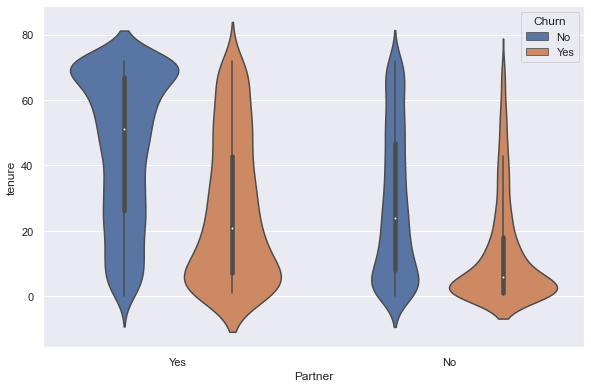

In [11]:
sns.violinplot(x='Partner',y='tenure',hue='Churn', data=df1)

### It can be observed that when the customers had a partner with tenure between 40-80 churned less and when the customers didn't have a partner with tenure between 0-20 churned more.

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

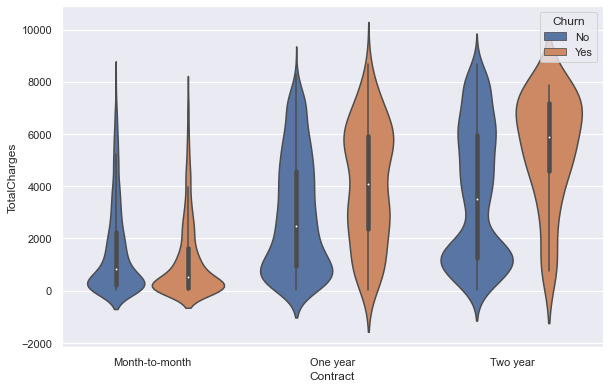

In [12]:
sns.violinplot(x='Contract',y='TotalCharges',hue='Churn', data=df1)

### It can be observed that when the customers had a contract of one year with TotalCharges less than 2000, less number of customers got churned and when the customers had a contract of two year with TotalCharges between 6000-8000 churned more.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

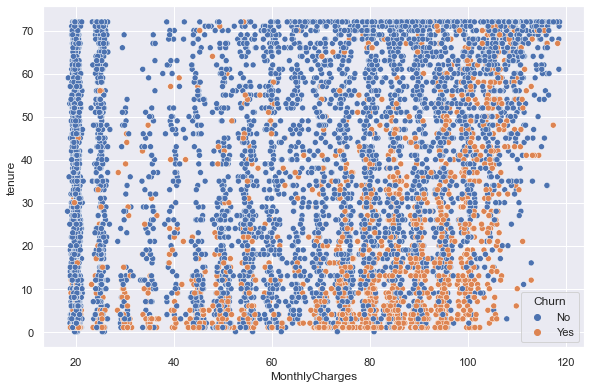

In [13]:
sns.scatterplot(data=df1, x='MonthlyCharges', y='tenure', hue='Churn')

### It can be observed that when the MonthlyCharges were above 60 and tenure below 50, more number of customers got churned.

---

## Preparing our data-

In [14]:
# Replacing 'Yes' and 'No' with 0 & 1
df1.loc[df1.Churn=='No','Churn'] = 0
df1.loc[df1.Churn=='Yes','Churn'] = 1

In [15]:
#Replacing 'No internet service' with 'No'
bot = ['OnlineBackup','StreamingMovies','DeviceProtection',
       'TechSupport','OnlineSecurity','StreamingTV']
for i in bot:
    df1[i] = df1[i].replace({'No internet service' : 'No'})

In [16]:
#Replace all the spaces with null values
df1['TotalCharges'] = df1['TotalCharges'].replace(" ",np.nan)

#Drop null values of the TotalCharges feature
df1 = df1[df1['TotalCharges'].notnull()]
df1 = df1.reset_index()[df1.columns]

#Convert TotalCharges column values to float data type
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

In [17]:
# Dropping irrelevant features
del df1['customerID']
del df1['gender']

In [19]:
#Perform feature scaling and one hot encoding
from sklearn.preprocessing import StandardScaler

#Perform feature Scaling on tenure month Total in order to bring them on same scale
StandardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure','MonthlyCharges','TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
df1[columns_for_ft_scaling] = StandardScaler.fit_transform(df1[columns_for_ft_scaling])

In [21]:
df1 = pd.get_dummies(df1,columns=['SeniorCitizen','Partner','Dependents',\
          'PhoneService','MultipleLines','InternetService',\
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',\
          'StreamingTV','StreamingMovies','Contract','PaperlessBilling',\
          'PaymentMethod','Churn'], drop_first=True)

In [22]:
#Create Feature variable x and target variable y
y = df1['Churn_1']
x = df1.drop(['Churn_1'], axis = 1)

## Feature selection-

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [24]:
print(model.feature_importances_)

[0.16036645 0.14695614 0.17087247 0.02714988 0.03024052 0.02476618
 0.00496587 0.0046513  0.0245993  0.05140456 0.02094898 0.02966967
 0.02798339 0.02571832 0.02730509 0.02306911 0.0232933  0.03351257
 0.04011435 0.03058704 0.01692851 0.04062832 0.01426869]


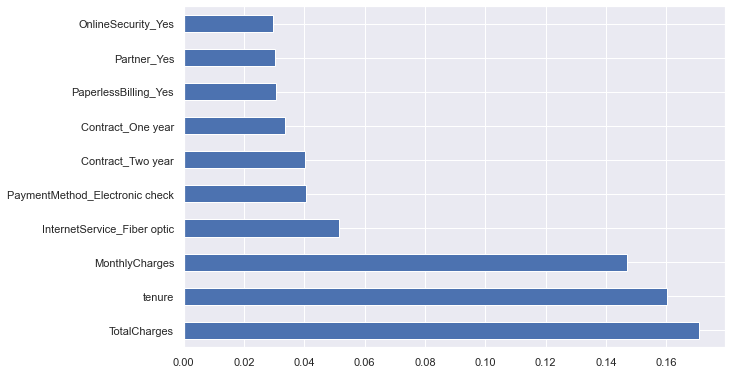

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## So the top 10 features which have greater impact on the churn are-

In [26]:
new = df1[['Contract_One year','PaperlessBilling_Yes','Partner_Yes','OnlineSecurity_Yes',\
          'PaymentMethod_Electronic check','Contract_Two year','InternetService_Fiber optic',\
          'MonthlyCharges','tenure','TotalCharges','Churn_1']].copy()

---

## Splitting the data-

In [27]:
#Create Feature variable x and target variable y
Y = new['Churn_1']
X = new.drop(['Churn_1'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Splitting into testing and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Importing libraries for building the models-

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [31]:
#DECISION TREE
decision = DecisionTreeClassifier(criterion = 'entropy')
#fit
decision.fit(x_train, y_train)
#predict
decision_pred = decision.predict(x_test)
decision_accuracy = accuracy_score(y_test,decision_pred)*100
print("Accuracy:",decision_accuracy) 
decision_score = f1_score(decision_pred, y_test)
print("F1 score:: {:.2f}".format(decision_score))
decision_prec = precision_score(y_test, decision_pred)
print("Precision:: {:.2f}".format(decision_prec))
decision_rec = recall_score(y_test, decision_pred)
print("Recall:: {:.2f}".format(decision_rec))

Accuracy: 72.93838862559242
F1 score:: 0.51
Precision:: 0.51
Recall:: 0.51


In [32]:
#LOGISTIC REGRESSION
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
log_pred = logmodel.predict(x_test)
log_accuracy = accuracy_score(y_test,log_pred)*100
print("Accuracy:",log_accuracy) 
log_score = f1_score(log_pred, y_test)
print("F1 score:: {:.2f}".format(log_score))
log_prec = precision_score(y_test, log_pred)
print("Precision:: {:.2f}".format(log_prec))
log_rec = recall_score(y_test, log_pred)
print("Recall:: {:.2f}".format(log_rec))

Accuracy: 79.90521327014218
F1 score:: 0.59
Precision:: 0.69
Recall:: 0.51


In [33]:
#SUPPORT VECTOR MACHINE
svcmodel = SVC(kernel='linear', random_state=50, probability = True)
svcmodel.fit(x_train,y_train)
svc_pred = svcmodel.predict(x_test)
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
print("Accuracy:",svc_accuracy)
svc_score = f1_score(svc_pred, y_test)
print("F1 score:: {:.2f}".format(svc_score))
svc_prec = precision_score(y_test, svc_pred)
print("Precision:: {:.2f}".format(svc_prec))
svc_rec = recall_score(y_test, svc_pred)
print("Recall:: {:.2f}".format(svc_rec))

Accuracy: 78.86
F1 score:: 0.57
Precision:: 0.66
Recall:: 0.51


In [34]:
#K-NEAREST NEIGHBOR MODEL
knnmodel = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
knnmodel.fit(x_train, y_train)
knn_pred = knnmodel.predict(x_test)
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
print("Accuracy:", knn_accuracy)
knn_score = f1_score(knn_pred, y_test)
print("F1 score:: {:.2f}".format(knn_score))
knn_prec = precision_score(y_test, knn_pred)
print("Precision:: {:.2f}".format(knn_prec))
knn_rec = recall_score(y_test, knn_pred)
print("Recall:: {:.2f}".format(knn_rec))

Accuracy: 76.73
F1 score:: 0.53
Precision:: 0.60
Recall:: 0.48


In [35]:
#RANDOM FORREST
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(x_train, y_train)
rf_pred = rfmodel.predict(x_test)
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
print("Accuracy:", rf_accuracy)
rf_score = f1_score(rf_pred, y_test)
print("F1 score:: {:.2f}".format(rf_score))
rf_prec = precision_score(y_test, rf_pred)
print("Precision:: {:.2f}".format(rf_prec))
rf_rec = recall_score(y_test, rf_pred)
print("Recall:: {:.2f}".format(rf_rec))

Accuracy: 77.68
F1 score:: 0.55
Precision:: 0.63
Recall:: 0.48


In [36]:
#NAIVE BAYES
gnbmodel = GaussianNB()
gnbmodel.fit(x_train, y_train)
gnb_pred = gnbmodel.predict(x_test)
gnb_accuracy = round(metrics.accuracy_score(y_test, gnb_pred) * 100, 2)
print("Accuracy:", gnb_accuracy)
gnb_score = f1_score(gnb_pred, y_test)
print("F1 score:: {:.2f}".format(gnb_score))
gnb_prec = precision_score(y_test, gnb_pred)
print("Precision:: {:.2f}".format(gnb_prec))
gnb_rec = recall_score(y_test, gnb_pred)
print("Recall:: {:.2f}".format(gnb_rec))

Accuracy: 73.89
F1 score:: 0.63
Precision:: 0.52
Recall:: 0.79


In [37]:
#LINEAR SVC MODEL
Lsvcmodel = LinearSVC(random_state=0)
Lsvcmodel.fit(x_train, y_train)
Lsvc_pred = Lsvcmodel.predict(x_test)
Lsvc_accuracy = round(metrics.accuracy_score(y_test, Lsvc_pred) * 100, 2)
print("Accuracy:", Lsvc_accuracy)
Lsvc_score = f1_score(Lsvc_pred, y_test)
print("F1 score:: {:.2f}".format(Lsvc_score))
Lsvc_prec = precision_score(y_test, Lsvc_pred)
print("Precision:: {:.2f}".format(Lsvc_prec))
Lsvc_rec = recall_score(y_test, Lsvc_pred)
print("Recall:: {:.2f}".format(Lsvc_rec))

Accuracy: 79.53
F1 score:: 0.57
Precision:: 0.68
Recall:: 0.49


In [38]:
#XGBOOST
xgbmodel = XGBClassifier()
xgbmodel.fit(x_train, y_train)
xgb_pred = xgbmodel.predict(x_test)
xgb_accuracy = round(metrics.accuracy_score(y_test, xgb_pred) * 100, 2)
print("Accuracy:", xgb_accuracy)
xgb_score = f1_score(xgb_pred, y_test)
print("F1 score:: {:.2f}".format(xgb_score))
xgb_prec = precision_score(y_test, xgb_pred)
print("Precision:: {:.2f}".format(xgb_prec))
xgb_rec = recall_score(y_test, xgb_pred)
print("Recall:: {:.2f}".format(xgb_rec))


[12:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 77.49
F1 score:: 0.55
Precision:: 0.62
Recall:: 0.50


---

## The model with the highest accuracy and F1-score- Logistic Regression followed by Linear SVC